<a href="https://colab.research.google.com/github/raymondkim777/JobListingDataAnalysis/blob/main/Data_Analysis_LR_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading & Installing Kaggle

In [2]:
'''
!pip install kaggle
from google.colab import files
files.upload()
'''

'\n!pip install kaggle\nfrom google.colab import files\nfiles.upload()\n'

In [3]:
'''
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle'''

'\n!mkdir -p ~/.kaggle\n!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!ls ~/.kaggle'

In [4]:
# !kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

In [5]:
# !ls
# !unzip  real-or-fake-fake-jobposting-prediction.zip

#Data Manipulation

Creating DataFrame sampling 1400 job listings (true/false)

In [6]:
import pandas as pd

file = "./drive/MyDrive/Work/Projects/Data_Analysis/fake_job_postings.csv"
df = pd.read_csv(file)
# df.info()

# print(pd.isna(df))
df.fillna(0, inplace=True)
# print(pd.isna(df))
# df.corr()
# df.describe()
col = df.columns
col

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
df2 = df.loc[:, [col[1], col[5], col[6], col[7], col[17]]]
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.loc[df2.loc[:, 'description'].str.strip().str.len() > 0]

df2['profile_yn'] = df2.loc[:, 'company_profile'].apply(lambda x: 1 if x != 0 else 0)
col2 = df2.columns
df2 = df2.loc[:, [col2[0], col2[2], col2[3], col2[4], col2[5]]]

df_t = df2.loc[df2.loc[:, col2[-2]] == 0]
df_f = df2.loc[df2.loc[:, col2[-2]] == 1]

df_t = df_t.sample(n=700, replace=False)
df_f = df_f.sample(n=700, replace=False)

sample_df = pd.concat([df_t, df_f], ignore_index=True)
sample_df

<ipython-input-7-92e3b1857c3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profile_yn'] = df2.loc[:, 'company_profile'].apply(lambda x: 1 if x != 0 else 0)


,title,description,requirements,fraudulent,profile_yn
0,Senior Ruby Developer,We’re looking for a Ruby Developer who is exci...,"Expert knowledge of Ruby, and RailsExperience ...",0,1
1,Experienced Sales/ Marketing Managers,Are you making Less than $18.00 an hour with...,"Sales Experience in Energy, Cable Insurance or...",0,1
2,Oracle HCM Fusion tech developer,Position: Oracle HCM Fusion tech developerLoca...,Technical developer with Oracle Fusion HCM exp...,0,0
3,Senior Ruby Developer,We love our team. If you like working with a s...,Must currently have advanced experienced with ...,0,1
4,Sales Lead Generation Specialist,BIME Analytics - LEAD GENERATION SPECIALISTThe...,Desired Experience and Knowledge:Bachelor’s De...,0,1
...,...,...,...,...,...
1395,Medical Intake Representative (Data Entry),What we prefer in a candidate:Great attitudeCa...,No requirements!,1,0
1396,Job for freelancer working in Saudi Arabia,Hundreds of Freelance Jobs available every mon...,Freelancer working in Saudi Arabia.,1,0
1397,CASH Pay Jobs (Part Time Staff Wanted),CASH Pay Jobs (Part Time Staff Wanted)You can ...,No any experience required.,1,0
1398,Home Based Payroll Data Entry Clerk Position -...,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,1,0


Opening stopword file

In [8]:
#!pip install nltk
import nltk
nltk.download('wordnet')

!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords_list = content.split(",")
finally:
    gist_file.close()

[nltk_data] Downloading package wordnet to /root/nltk_data...


--2024-01-14 01:32:59--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6.1K) [text/plain]
Saving to: ‘gist_stopwords.txt’

gist_stopwords.txt  100%[===================>]   6.12K  --.-KB/s    in 0s      

2024-01-14 01:32:59 (48.4 MB/s) - ‘gist_stopwords.txt’ saved [6271/6271]



Removing stopwords & nonsensical words, saving remaining words into list

In [9]:
from nltk.corpus import wordnet

cols = ['title', 'description', 'requirements']

def check_word(word):
  return len(wordnet.synsets(word)) > 0

def remove_non_alpha(word, word_list):
  new_word = word
  for i in range(len(word)):
    if not word[i].isalpha():
      new_word = word[:i]
      rest = word[i + 1:]
      if rest != "":
        word_list.append(rest)
      break
  if check_word(new_word):
    return new_word
  return None

def remove_stop(word_list):
  i = 0
  while i < len(word_list):
    word_list[i] = remove_non_alpha(word_list[i], word_list)
    if word_list[i] is None or word_list[i] == "" or word_list[i] in stopwords_list:
      del word_list[i]
    else:
      i += 1

for idx, r in sample_df.iterrows():
  for c in cols:
    word_list = r[c].lower().split()
    remove_stop(word_list)
    sample_df.at[idx, c] = word_list

sample_df

,title,description,requirements,fraudulent,profile_yn
0,"[senior, ruby, developer]","[ruby, developer, excited, creating, solid, re...","[expert, knowledge, ruby, setting, monitoring,...",0,1
1,"[experienced, sales, marketing, managers]","[making, hour, cash, bonuses, future, company,...","[sales, experience, energy, cable, insurance, ...",0,1
2,"[oracle, fusion, tech, developer]","[position, oracle, fusion, tech, months, contr...","[technical, developer, oracle, fusion, experie...",0,0
3,"[senior, ruby, developer]","[love, team, working, smart, team, genuinely, ...","[advanced, experienced, ruby, rails, prefer, c...",0,1
4,"[sales, lead, generation, specialist]","[lead, generation, sales, lead, generation, sp...","[desired, experience, knowledge, degree, prefe...",0,1
...,...,...,...,...,...
1395,"[medical, intake, representative, entry, data]","[prefer, candidate, student, customer, provide...",[requirements],1,0
1396,"[job, freelancer, working, saudi, arabia]","[hundreds, freelance, jobs, month, freelance, ...","[freelancer, working, saudi, arabia]",1,0
1397,"[cash, pay, jobs, time, staff, wanted]","[cash, pay, jobs, time, staff, wanted, free, t...","[experience, required]",1,0
1398,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0


Calculating tf-idf (separately for each column)

In [15]:
cols = ['description', 'requirements']
tfreq_list = {c: [dict() for i in range(1400)] for c in cols}
dfreq = {c: dict() for c in cols}

def update_freq(word: str, freq: dict):
  if word in freq.keys():
    freq[word] += 1
  else:
    freq[word] = 1

def run_freq(tfreq_list: list, dfreq: dict, col: str):
  for idx, r in sample_df.iterrows():
    for word in r[col]:
      update_freq(word, tfreq_list[idx])
      update_freq(word, dfreq)

for c in cols:
  run_freq(tfreq_list[c], dfreq[c], c)
  dfreq[c] = dict(sorted(dfreq[c].items(), key=lambda x:x[1], reverse=True))

In [16]:
import math

N = 1400
tf_idf = {c: [dict() for i in range(1400)] for c in cols}

def calc_tf_idf(col: str):
  for i in range(1400):
    for word in tfreq_list[col][i]:
      tf = tfreq_list[col][i][word]
      df = dfreq[col][word]
      idf = math.log(N / (1 + df))
      tf_idf[col][i][word] = tf * idf
    tf_idf[col][i] = dict(sorted(tf_idf[col][i].items(), key=lambda x:x[1], reverse=True))

for c in cols:
  calc_tf_idf(c)

for i in range(1400):
  for c in cols:
    if len(tf_idf[c][i]) == 0:
      print(f"{i} ", end="")


38 170 727 802 889 984 1149 1256 1256 

(Printing average number of words in each column)

In [17]:
key_num = [
    {c: [] for c in cols},
    {c: [] for c in cols}
]

for idx, r in sample_df.iterrows():
  for c in cols:
    if len(tf_idf[c][idx]) != 0:
      key_num[r['profile_yn']][c].append(len(tf_idf[c][idx]))

for i in range(2):
  for c in cols:
    key_num[i][c] = sum(key_num[i][c]) / len(key_num[i][c])

print(key_num)

[{'description': 62.10204081632653, 'requirements': 32.022346368715084}, {'description': 73.68604651162791, 'requirements': 43.616374269005846}]


Selecting 5 keywords with highest tf-idf value for each cell

In [18]:
cols = ['description', 'requirements']
keyword_cnt = 5

def add_keywords(kw_cnt: int, col: str):
  col_name = f'{col[:3]}_keywords'
  sample_df[col_name] = None
  for i in range(1400):
    keywords = []
    for j in range(kw_cnt):
      if len(tf_idf[col][i].keys()) <= j:
        break
      keywords.append(list(tf_idf[col][i].keys())[j])
    sample_df.at[i, col_name] = keywords

for c in cols:
  add_keywords(keyword_cnt, c)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords
0,"[senior, ruby, developer]","[ruby, developer, excited, creating, solid, re...","[expert, knowledge, ruby, setting, monitoring,...",0,1,"[pack, excited, difference, dog, zealots]","[borough, couple, scaling, london, days]"
1,"[experienced, sales, marketing, managers]","[making, hour, cash, bonuses, future, company,...","[sales, experience, energy, cable, insurance, ...",0,1,"[bonuses, extra, baltimore, traveling, limitat...","[discussed, groomed, cable, cut, met]"
2,"[oracle, fusion, tech, developer]","[position, oracle, fusion, tech, months, contr...","[technical, developer, oracle, fusion, experie...",0,0,"[fusion, oracle, tech, months, contract]","[fusion, oracle, extracts, ebs, developer]"
3,"[senior, ruby, developer]","[love, team, working, smart, team, genuinely, ...","[advanced, experienced, ruby, rails, prefer, c...",0,1,"[love, fun, react, tickle, brain]","[remote, hound, fridays, august, spend]"
4,"[sales, lead, generation, specialist]","[lead, generation, sales, lead, generation, sp...","[desired, experience, knowledge, degree, prefe...",0,1,"[generation, identify, leads, lead, prospects]","[cultivate, business, google, desired, communi..."
...,...,...,...,...,...,...,...
1395,"[medical, intake, representative, entry, data]","[prefer, candidate, student, customer, provide...",[requirements],1,0,"[prefer, prospective, equal, exceptional, excel]",[requirements]
1396,"[job, freelancer, working, saudi, arabia]","[hundreds, freelance, jobs, month, freelance, ...","[freelancer, working, saudi, arabia]",1,0,"[freelance, bloggers, popular, hundreds, writers]","[freelancer, saudi, arabia, working]"
1397,"[cash, pay, jobs, time, staff, wanted]","[cash, pay, jobs, time, staff, wanted, free, t...","[experience, required]",1,0,"[cash, wanted, fee, rg, afternoon]","[required, experience]"
1398,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0,"[seekers, remotely, equally, decide, light]","[access, internet, address, participate, typing]"


Loading vector space model for comparing word similarity

In [19]:
from gensim.models import KeyedVectors
import gensim.downloader as api


model_path = "/content/drive/MyDrive/Work/Projects/Data_Analysis/"

# model = api.load("word2vec-google-news-300")
# model.save(model_path + 'word2vvec-google-new-300.model')

In [20]:
model = KeyedVectors.load(model_path + 'word2vvec-google-new-300.model')
sim_score = model.similarity("you", "suck")
print(f"score : {sim_score}")

score : 0.3054656982421875


Calculating ~25 similarity values for 5 keywords each in two columns.
Emphasizes similarity values over 0.25 and lessens values below 0.25.
Yields final sim score & saves it in dataframe.
Process is repeated for column pairs (title/desc), (desc/req).

In [21]:
import numpy as np

cols = [
    'title',
    'des_keywords',
    'req_keywords',
    'rel_sim_score1',
    'rel_sim_score2'
]

sample_df[cols[3]] = None
sample_df[cols[4]] = None

sim_standard = 0.25
rel_sim_score1 = 0
rel_sim_score2 = 0

for idx, r in sample_df.iterrows():
  rel_sim_scores1 = []
  rel_sim_scores2 = []

  for word2 in r[cols[1]]:
    for word1 in r[cols[0]]:
      try:
        rel_sim_score1 = model.similarity(word1, word2)
        rel_sim_scores1.append((word1 != word2) * (rel_sim_score1 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores1.append(0)
    for word3 in r[cols[2]]:
      try:
        rel_sim_score2 = model.similarity(word2, word3)
        rel_sim_scores2.append((word2 != word3) * (rel_sim_score2 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores2.append(0)

  if len(rel_sim_scores1) == 0:
    rel_sim_scores1.append(0)
  if len(rel_sim_scores2) == 0:
    rel_sim_scores2.append(0)

  sample_df.at[idx, cols[3]] = np.sqrt(sum(rel_sim_scores1)) / len(rel_sim_scores1)
  sample_df.at[idx, cols[4]] = np.sqrt(sum(rel_sim_scores2)) / len(rel_sim_scores2)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords,rel_sim_score1,rel_sim_score2
0,"[senior, ruby, developer]","[ruby, developer, excited, creating, solid, re...","[expert, knowledge, ruby, setting, monitoring,...",0,1,"[pack, excited, difference, dog, zealots]","[borough, couple, scaling, london, days]",0.055072,0.070817
1,"[experienced, sales, marketing, managers]","[making, hour, cash, bonuses, future, company,...","[sales, experience, energy, cable, insurance, ...",0,1,"[bonuses, extra, baltimore, traveling, limitat...","[discussed, groomed, cable, cut, met]",0.07014,0.08395
2,"[oracle, fusion, tech, developer]","[position, oracle, fusion, tech, months, contr...","[technical, developer, oracle, fusion, experie...",0,0,"[fusion, oracle, tech, months, contract]","[fusion, oracle, extracts, ebs, developer]",0.090417,0.074354
3,"[senior, ruby, developer]","[love, team, working, smart, team, genuinely, ...","[advanced, experienced, ruby, rails, prefer, c...",0,1,"[love, fun, react, tickle, brain]","[remote, hound, fridays, august, spend]",0.063155,0.112238
4,"[sales, lead, generation, specialist]","[lead, generation, sales, lead, generation, sp...","[desired, experience, knowledge, degree, prefe...",0,1,"[generation, identify, leads, lead, prospects]","[cultivate, business, google, desired, communi...",0.118876,0.093208
...,...,...,...,...,...,...,...,...,...
1395,"[medical, intake, representative, entry, data]","[prefer, candidate, student, customer, provide...",[requirements],1,0,"[prefer, prospective, equal, exceptional, excel]",[requirements],0.061328,0.264328
1396,"[job, freelancer, working, saudi, arabia]","[hundreds, freelance, jobs, month, freelance, ...","[freelancer, working, saudi, arabia]",1,0,"[freelance, bloggers, popular, hundreds, writers]","[freelancer, saudi, arabia, working]",0.168688,0.197561
1397,"[cash, pay, jobs, time, staff, wanted]","[cash, pay, jobs, time, staff, wanted, free, t...","[experience, required]",1,0,"[cash, wanted, fee, rg, afternoon]","[required, experience]",0.120056,0.182236
1398,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0,"[seekers, remotely, equally, decide, light]","[access, internet, address, participate, typing]",0.061863,0.089163


Printing final dataframe with extracted similarity quantities.
Here, rel_sim_score1 is for (title/desc), rel_sim_score2 is for (desc/req).

In [22]:
col = sample_df.columns
final_df = sample_df[[col[4], col[7], col[8], col[3]]]
final_df

,profile_yn,rel_sim_score1,rel_sim_score2,fraudulent
0,1,0.055072,0.070817,0
1,1,0.07014,0.08395,0
2,0,0.090417,0.074354,0
3,1,0.063155,0.112238,0
4,1,0.118876,0.093208,0
...,...,...,...,...
1395,0,0.061328,0.264328,1
1396,0,0.168688,0.197561,1
1397,0,0.120056,0.182236,1
1398,0,0.061863,0.089163,1


#Logistic Regression

##Graph 1 (profile_yn & rel_sim_score2)

Logistic Regression model, with quantities from profile_yn and rel_sim_score2.

In [23]:
m1_x = final_df.loc[:, ['profile_yn', 'rel_sim_score2']]
m1_y = final_df.loc[:, 'fraudulent']
print(m1_x)
print(m1_y)

      profile_yn rel_sim_score2
0              1       0.070817
1              1        0.08395
2              0       0.074354
3              1       0.112238
4              1       0.093208
...          ...            ...
1395           0       0.264328
1396           0       0.197561
1397           0       0.182236
1398           0       0.089163
1399           0       0.102565

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m1_x, m1_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7607142857142857


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-26-443a7e655034>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


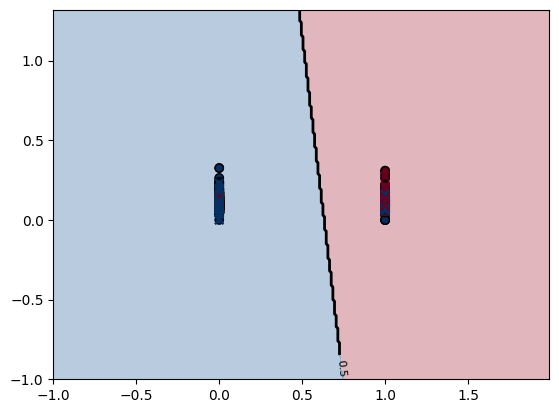

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Summary of model: only factor in data being split is profile_yn, with rel_sim_score1 having no effect. Usage of profile_yn for logistic regression is seemingly unfit. Better usage for Decision Tree (below).

##Graph 2 (rel_sim_score1 & rel_sim_score2)

Logistic Regression model, with quantities from rel_sim_score1 and rel_sim_score2.

In [27]:
m2_x = final_df.loc[:, ['rel_sim_score1', 'rel_sim_score2']]
m2_y = final_df.loc[:, 'fraudulent']
print(m2_x)
print(m2_y)

     rel_sim_score1 rel_sim_score2
0          0.055072       0.070817
1           0.07014        0.08395
2          0.090417       0.074354
3          0.063155       0.112238
4          0.118876       0.093208
...             ...            ...
1395       0.061328       0.264328
1396       0.168688       0.197561
1397       0.120056       0.182236
1398       0.061863       0.089163
1399       0.173492       0.102565

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m2_x, m2_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [29]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.55


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-30-443a7e655034>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


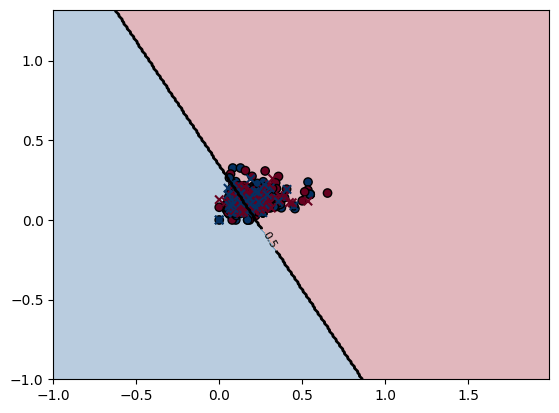

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()


Summary of model: Inconclusive division. Perhaps extracted quantities weren't as meaningful. Different data manipulation method required.

#Decision Tree

Importing Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

x_col = ['profile_yn', 'rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

dt1_x = final_df.loc[:, x_col]
dt1_y = final_df.loc[:, y_col]

print(dt1_x)
print(dt1_y)

      profile_yn rel_sim_score1 rel_sim_score2
0              1       0.055072       0.070817
1              1        0.07014        0.08395
2              0       0.090417       0.074354
3              1       0.063155       0.112238
4              1       0.118876       0.093208
...          ...            ...            ...
1395           0       0.061328       0.264328
1396           0       0.168688       0.197561
1397           0       0.120056       0.182236
1398           0       0.061863       0.089163
1399           0       0.173492       0.102565

[1400 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Decision Tree Model

In [32]:
x_train, x_test, y_train, y_test = train_test_split(dt1_x, dt1_y, test_size=0.2)
dt1_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt1_model.fit(x_train, y_train)

print(f"acc: {accuracy_score(y_test, dt1_model.predict(x_test))}")
print(f"{classification_report(y_test, dt1_model.predict(x_test))}")

acc: 0.7285714285714285
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       147
           1       0.73      0.68      0.70       133

    accuracy                           0.73       280
   macro avg       0.73      0.73      0.73       280
weighted avg       0.73      0.73      0.73       280



[Text(0.5, 0.875, 'profile_yn <= 0.5\ngini = 0.5\nsamples = 1120\nvalue = [553, 567]\nclass = false'),
 Text(0.25, 0.625, 'rel_sim_score1 <= 0.307\ngini = 0.306\nsamples = 430\nvalue = [81, 349]\nclass = false'),
 Text(0.125, 0.375, 'rel_sim_score1 <= 0.09\ngini = 0.291\nsamples = 418\nvalue = [74, 344]\nclass = false'),
 Text(0.0625, 0.125, 'gini = 0.182\nsamples = 99\nvalue = [10, 89]\nclass = false'),
 Text(0.1875, 0.125, 'gini = 0.321\nsamples = 319\nvalue = [64, 255]\nclass = false'),
 Text(0.375, 0.375, 'rel_sim_score1 <= 0.366\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = true'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = true'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = false'),
 Text(0.75, 0.625, 'rel_sim_score1 <= 0.102\ngini = 0.432\nsamples = 690\nvalue = [472, 218]\nclass = true'),
 Text(0.625, 0.375, 'rel_sim_score2 <= 0.051\ngini = 0.285\nsamples = 145\nvalue = [120, 25]\nclass = true'),
 Text(0.5625, 0.12

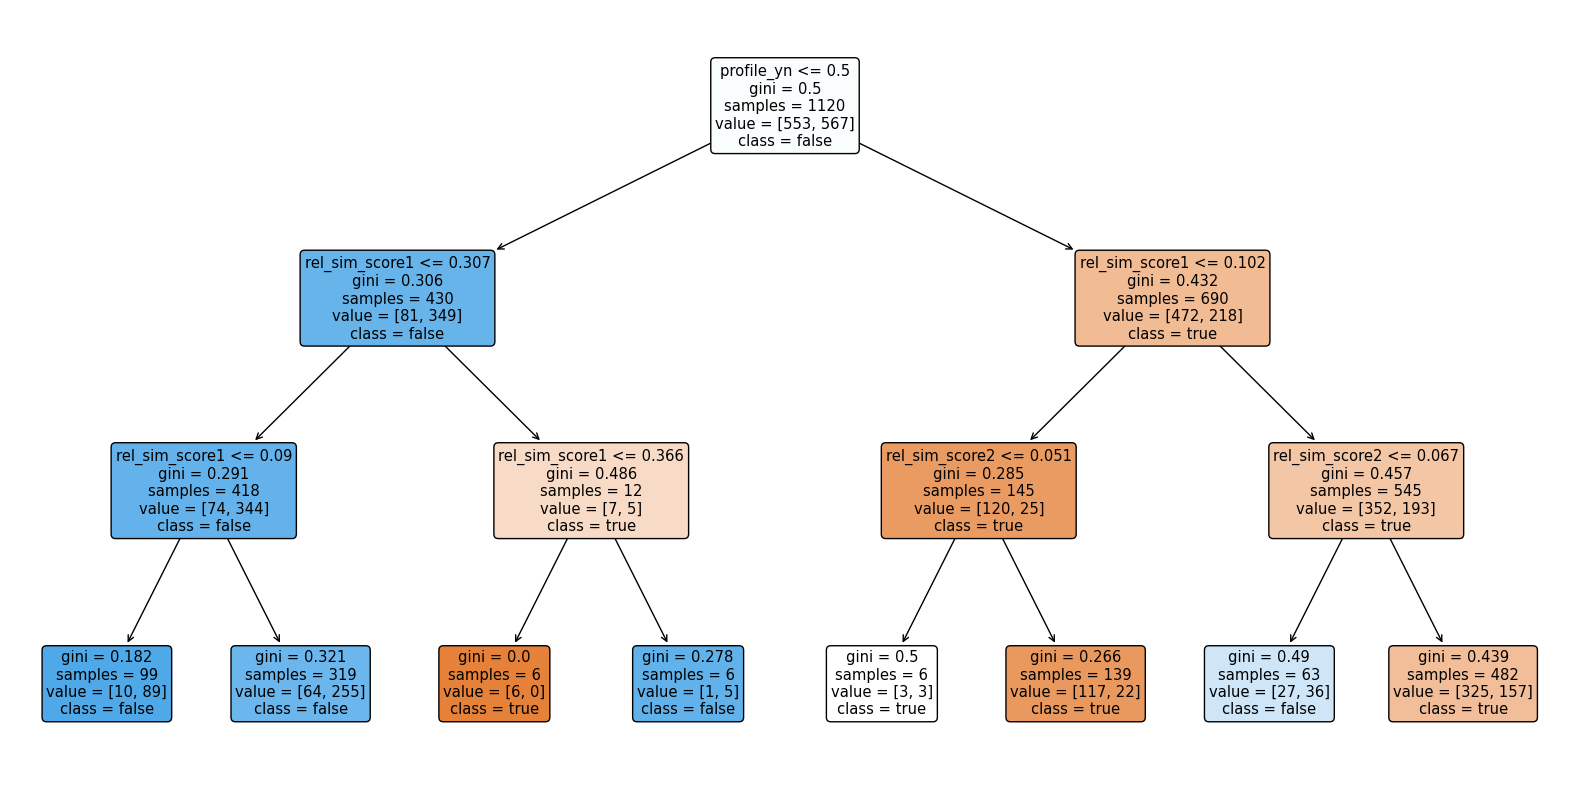

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt1_model, filled=True, feature_names=x_col, class_names=['true', 'false'], rounded=True)

Model results: Decision Tree classification is arguably pretty good.
However main factor for classification is once again profile_yn.
Idea to initially split data with profile_yn, then run logistic regression afterwards (shown below).

# Decision + Logistic Regression

(Rationale explained above)

In [34]:
final_df_py = final_df.loc[final_df.loc[:, 'profile_yn'] == 1]
final_df_pn = final_df.loc[final_df.loc[:, 'profile_yn'] == 0]

##Profile: Y

In [35]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_py.loc[:, x_col]
py_y = final_df_py.loc[:, y_col]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [37]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.6918604651162791


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-38-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


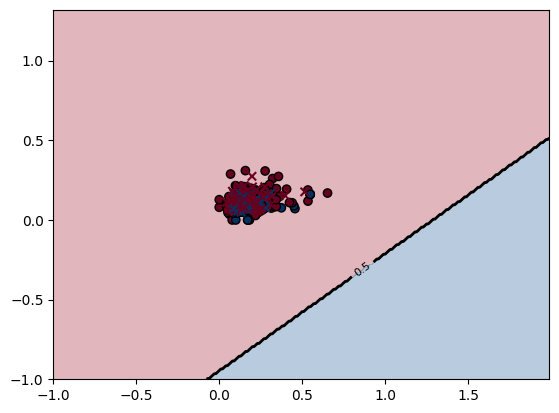

In [38]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive.

##Profile: N

In [39]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_pn.loc[:, x_col]
py_y = final_df_pn.loc[:, y_col]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [41]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7407407407407407


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-42-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


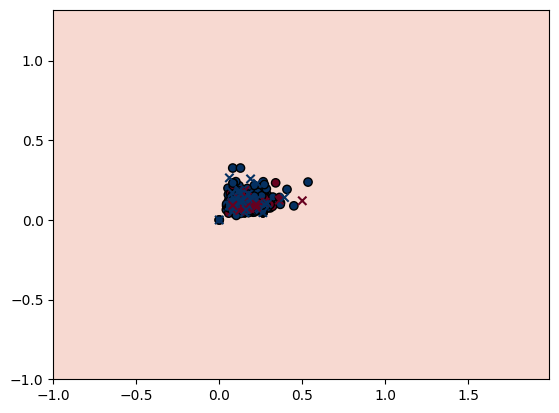

In [42]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive

i want to kill myself